In [1]:
%pip install pandas
%pip install prophet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
# Import nacessary libreries
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [24]:
# Load data and set it as prefered while using Prophet
from pandas import to_datetime
data = pd.read_csv("C:/Users/User/Downloads/demo-data.csv")
df = data.drop(['voucher_number','voucher_type','party_name','branch_name','mailing_pincode','item','rate','rate'],axis=1)
df=df.drop(['mailing_state','amount'],axis=1)
df.info()
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      2009 non-null   object
 1   quantity  2009 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.5+ KB


,ds,y
0,2020-04-01,-10
1,2020-04-01,-10
2,2020-06-08,55
3,2020-06-08,1
4,2020-06-08,55


In [4]:
# Removing Duplicate values
df = df.drop_duplicates()
df[df.duplicated()]
df

,ds,y
0,2020-04-01,-10
2,2020-06-08,55
3,2020-06-08,1
7,2020-06-08,-55
9,2020-06-08,-1
...,...,...
1986,2021-02-16,-55
1992,2021-02-08,-1
2006,2021-01-29,-110
2007,2021-01-29,-2


In [25]:
# fitting dataset into model
model = Prophet()
model.fit(df)

16:05:43 - cmdstanpy - INFO - Chain [1] start processing
16:05:43 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods = 12*3,freq='ME')

In [14]:
# yhat: Actual Prediction, yhat_upper,yhat_lower is the uncertanity of the predictoin.(Same for trend)  
forecast = model.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower','trend','trend_upper','trend_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower,trend,trend_upper,trend_lower
118,2023-09-30,-564.515754,163.025943,-1302.492918,-604.153654,-248.555232,-943.730265
119,2023-10-31,-662.679675,95.089351,-1427.474374,-623.118003,-249.176377,-980.149107
120,2023-11-30,-735.000519,29.647224,-1449.349045,-641.470599,-250.358373,-1016.441775
121,2023-12-31,-622.583317,167.401813,-1349.423170,-660.434948,-254.313900,-1055.685811
122,2024-01-31,-797.049688,11.788136,-1530.643487,-679.399298,-258.257119,-1094.180784


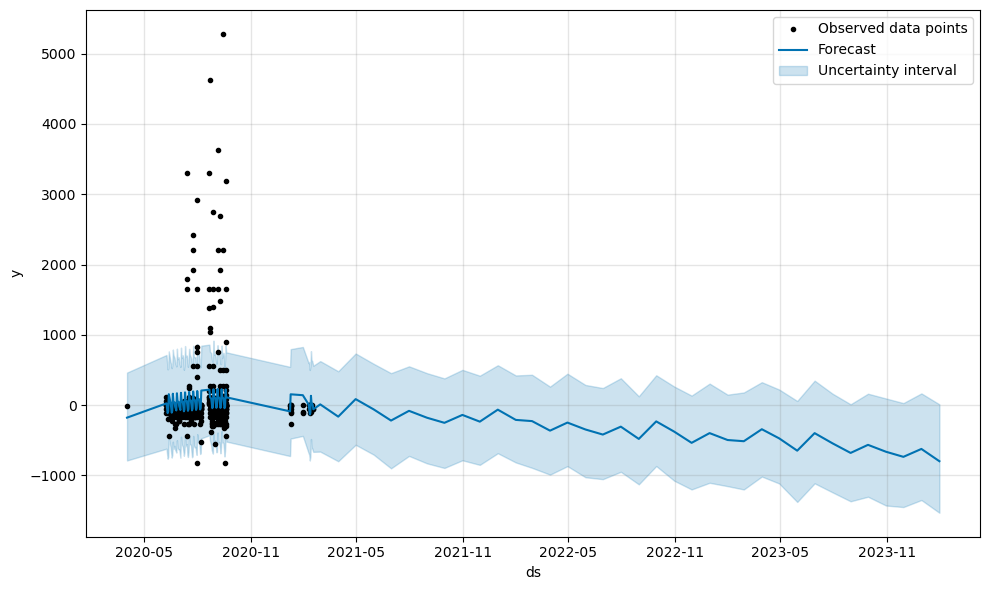

In [15]:
from prophet.plot import add_changepoints_to_plot

fig1 = model.plot(forecast,include_legend=True)

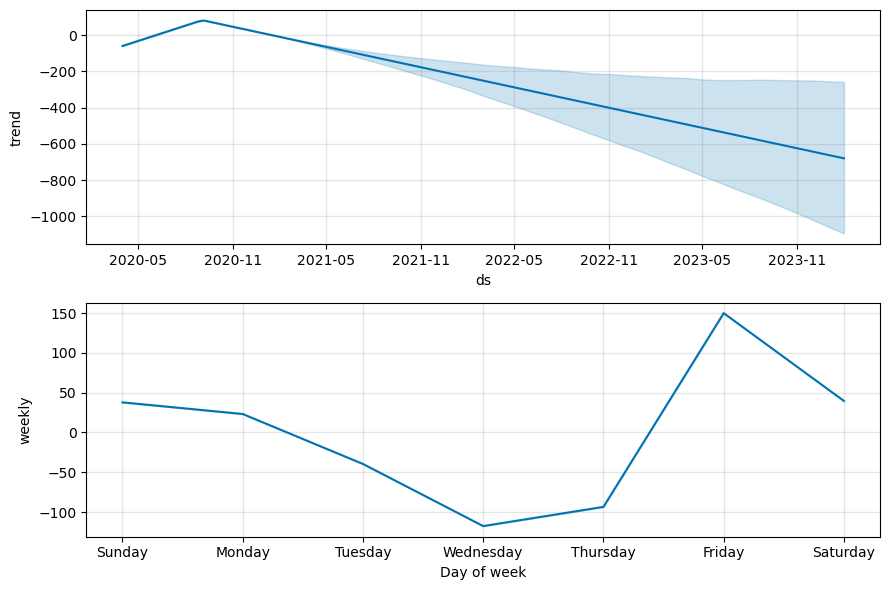

In [16]:
fig2 = model.plot_components(forecast)

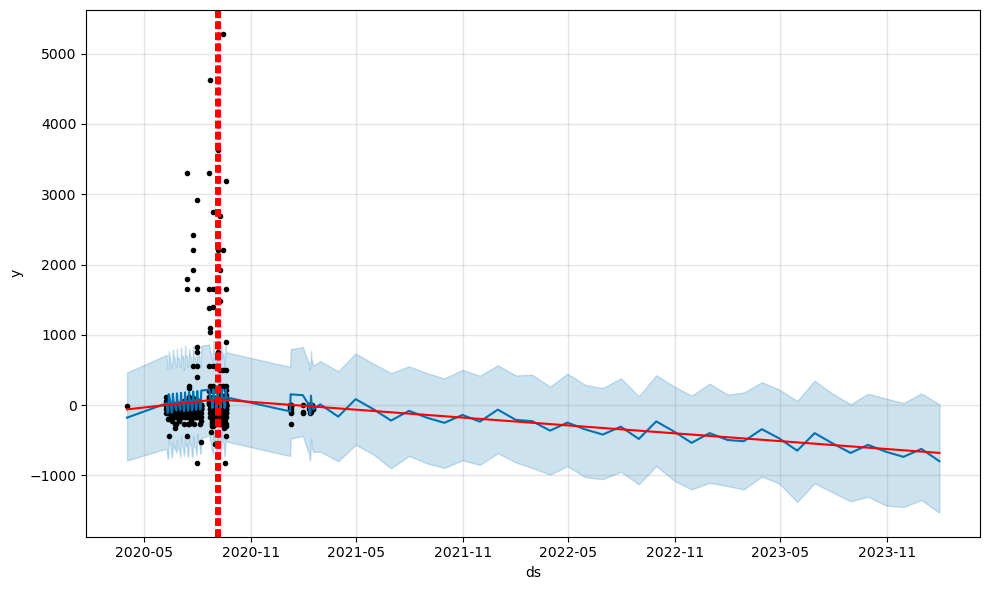

In [17]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),model, forecast)